In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from textblob import TextBlob

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def summarize_text(text):
    doc = nlp(text)
    sentence_scores = {}

    # Score sentences based on keyword occurrences
    for sent in doc.sents:
        for token in sent:
            if token.text.lower() in STOP_WORDS or token.is_punct:
                continue
            sentence_scores[sent] = sentence_scores.get(sent, 0) + 1

    # Sort and return the top 2 sentences as summary
    summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:2]
    summary = " ".join([str(sentence) for sentence in summary_sentences])

    return summary

In [ ]:
def extract_info(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Named Entity Recognition (NER)
    print("Named Entities:")
    for ent in doc.ents:
        print(f"{ent.text} ({ent.label_})")

    # Keyword extraction
    keywords = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ') and token.text.lower() not in
STOP_WORDS and not token.is_punct]
    print("\nKeywords/Phrases:")
    print(", ".join(keywords))

    # Parts of Speech (POS) tagging and Dependency relations
    print("\nParts of Speech and Dependencies:")
    for token in doc:
        print(f"{token.text} ({token.pos_}) <--{token.dep_}-- {token.head.text}")

    # Keyword Frequency
    keyword_freq = Counter(keywords)
    print("\nKeyword Frequencies:")
    for word, freq in keyword_freq.most_common():
        print(f"{word}: {freq}")

    # Prepare data for plotting
    words = [word for word, _ in keyword_freq.most_common()]
    frequencies = [freq for _, freq in keyword_freq.most_common()]

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies, y=words, palette="viridis")

    # Add titles and labels
    plt.title("Keyword Frequencies")
    plt.xlabel("Frequency")
    plt.ylabel("Keywords")

    # Display the plot
    plt.show()

    # Sentiment analysis using TextBlob
    blob = TextBlob(text)
    sentiment = blob.sentiment
    print("\nSentiment Analysis:")
    print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

    # Provide overall sentiment based on polarity
    if sentiment.polarity > 0:
        overall_sentiment = "Positive"
    elif sentiment.polarity == 0:
        overall_sentiment = "Neutral"
    else:
        overall_sentiment = "Negative"

    print(f"Overall Sentiment: {overall_sentiment}")

    # Summarize text
    summary = summarize_text(text)
    print("\nSummary:")
    print(summary)

    parse_tree(text)

    return

In [ ]:
from spacy import displacy

def parse_tree(text):
  # Process the text
  doc = nlp(text)

  # Visualize the dependency parse tree
  displacy.render(doc, style="dep")

  options = {"distance": 90, "color": "blue", "bg": "#f8f8f8", "font": "Arial"}
  displacy.render(doc, style="dep", options=options)


Named Entities:
Apple (ORG)
U.K. (GPE)
$1 billion (MONEY)
Tim Cook (PERSON)
Apple (ORG)
U.K. (GPE)
the last five years (DATE)
Apple (ORG)

Keywords/Phrases:
startup, CEO, excited, project, operations, years, acquisition, important, startup, artificial, intelligence, current, focus, innovation

Parts of Speech and Dependencies:
Apple (PROPN) <--nsubj-- looking
is (AUX) <--aux-- looking
looking (VERB) <--ROOT-- looking
at (ADP) <--prep-- looking
buying (VERB) <--pcomp-- at
a (DET) <--det-- startup
U.K. (PROPN) <--compound-- startup
startup (NOUN) <--dobj-- buying
for (ADP) <--prep-- startup
$ (SYM) <--quantmod-- billion
1 (NUM) <--compound-- billion
billion (NUM) <--pobj-- for
. (PUNCT) <--punct-- looking
The (DET) <--det-- CEO
CEO (NOUN) <--nsubj-- is
Tim (PROPN) <--compound-- Cook
Cook (PROPN) <--appos-- CEO
is (AUX) <--ROOT-- is
excited (ADJ) <--acomp-- is
about (ADP) <--prep-- excited
the (DET) <--det-- project

 (SPACE) <--dep-- the
project (NOUN) <--pobj-- about
. (PUNCT) <--punct-

<ipython-input-14-1d337fc7f789>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


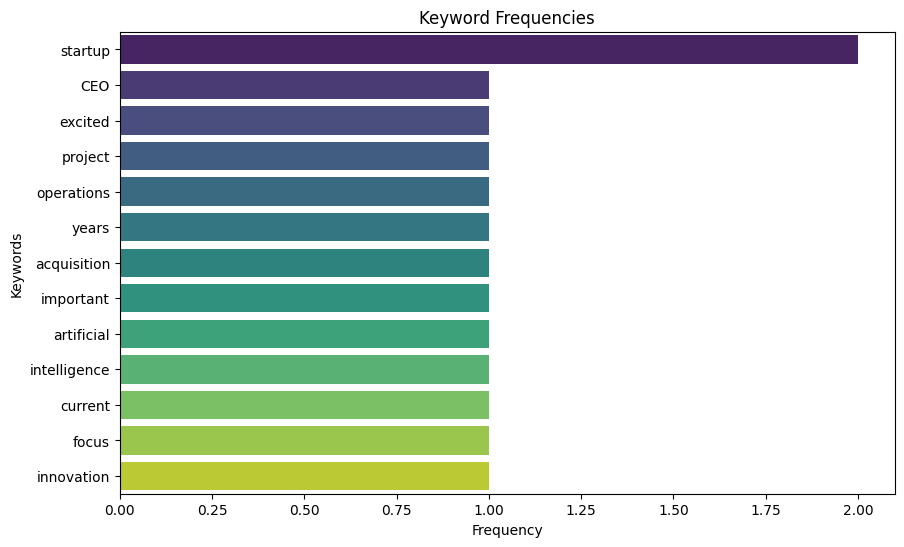


Sentiment Analysis:
Polarity: 0.03500000000000001, Subjectivity: 0.6433333333333333
Overall Sentiment: Positive

Summary:
Apple has been expanding its operations in the U.K. for the last five years, which makes this acquisition
important. The startup specializes in artificial intelligence, which aligns with Apple's current focus on innovation.


In [ ]:
# Example text
text = """Apple is looking at buying a U.K. startup for $1 billion. The CEO Tim Cook is excited about the
project. Apple has been expanding its operations in the U.K. for the last five years, which makes this acquisition
important. The startup specializes in artificial intelligence, which aligns with Apple's current focus on innovation."""

# Extract and display information
extract_info(text)